In [1]:
# Using KNN Algorithm
import pandas as pa

In [2]:
sd=pa.read_csv("E:\\6thSem\\DSDA_Project\\ILPD.csv")

In [3]:
sd.head(3)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [4]:
sd.tail(3)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


In [5]:
sd.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [6]:
import numpy as np
import seaborn as sn

In [7]:
sd.shape

(583, 11)

In [8]:
sd['alkphos'].fillna(method='ffill',inplace=True)

In [9]:
sd.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [10]:
gender=sd.iloc[:,1]

In [11]:
from sklearn.preprocessing import LabelEncoder

In [13]:
g0=sd.iloc[0:,1]

In [14]:
f6=LabelEncoder().fit_transform(g0)

In [15]:
sd['gen']=f6

In [16]:
sd.head(3)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gen
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1


In [17]:
sd2=pa.get_dummies(gender)

In [18]:
#sd2

In [19]:
#x=sd.iloc[0:,[0,2,3,4,5,6,7,8,10]]
#y=sd.iloc[0:,-1]

In [20]:
#sn.heatmap(x.corr())

In [21]:
x1=sd.iloc[0:,[0,2,4,5,6,7,9,11]]
y1=sd.iloc[0:,-1]

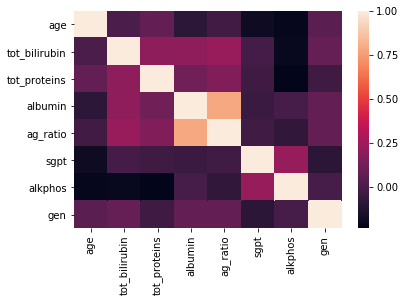

In [22]:
sn.heatmap(x1.corr())

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=68)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=37)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=37, p=2,
           weights='uniform')

In [28]:
y_pred=classifier.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.815068493150685


In [30]:
# 81% accuracy in prediction

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0  27]
 [  0 119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.82      1.00      0.90       119

   micro avg       0.82      0.82      0.82       146
   macro avg       0.41      0.50      0.45       146
weighted avg       0.66      0.82      0.73       146



C:\Users\My_NoteBook\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\My_NoteBook\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\My_NoteBook\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
# To calculate the best random state
from sklearn.neighbors import KNeighborsClassifier
ts_score=[]
for j in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=j)
    lr=KNeighborsClassifier().fit(x_train,y_train)
    ts_score.append(lr.score(x_test,y_test))
J=ts_score.index(np.max(ts_score))

In [25]:
J

68